> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# IV: KNN Classifier

<div style="text-align: right"> **Due date: 16 Nov., 2018.** </div> 
<div style="text-align: right"> **Please upload your file @ yscec by 9 PM.** </div> 
<h4><div style="text-align: right"> **For one day late (70% credit), please send your file to your TAs in the form of [ID_Name_HW4.ipynb].**</div> </h4>

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code for the programming part (**if not you will get a F grade**).

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2018-11-14 23:22:59.165175


## Problem description

In this homework, we will implement a k-NN classifier with the MNIST dataset. The MNIST dataset contains handwritten digits with corresponding labels from $0$ to $9$, and it has been commonly used for testing various machine learning algorithms. The $\texttt{sklearn.datasets}$ package provides the MNIST dataset. You can load the dataset as follows.

In [2]:
from sklearn import datasets
import numpy as np

In [3]:
mnist = datasets.load_digits()

The $\texttt{train_test_split}$ function from $\texttt{sklearn.cross_validation}$ package makes it easy to split datasets into training and test sets. We can easily makes a validation set from the test one as well. See the example shown below.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
(X_train, X_test, y_train, y_test) = train_test_split(np.array(mnist.data), mnist.target, test_size=0.33, random_state=42)
(X_train, X_val, y_train, y_val) = train_test_split(X_train, y_train, test_size=0.33, random_state=42)
print(mnist.data.shape, X_train.shape, X_test.shape, X_val.shape)

(1797, 64) (806, 64) (594, 64) (397, 64)


where X_train, X_test and X_val are training, test, and validation sets, respectively. y_train, y_test and y_val are labels for X_train, X_test, and X_val, respectively.

The datset contains 64-dimensional vectors, and we can visualize each one with the $\texttt{imshow}$ function after reshaping it as follows.

In [6]:
import matplotlib.pyplot as plt

A label for 8th sample in the training set is 5


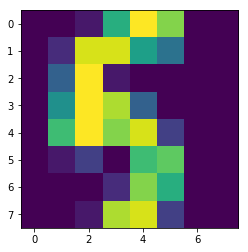

In [7]:
sample_number = 8
n_col = 8
n_row = 8
im=plt.imshow(X_train[sample_number].reshape(n_col,n_col))
print('A label for %dth sample in the training set is %d' % (sample_number, y_train[sample_number]))

(*80 points*) P1.1 Implement a K-NN classifier.    
(*20 points*) P1.2 The number of nearest neighbors $k$ in the classifier is a hyperparameter. Plot accuracy on the validation set according to the value of $k$, where $k = 1,2,...,20$. Choose the optimal $k$ value from the plot and compute accuracy on the test set. 


In [8]:
#P1.1
import math
def distance (x_i, x_q):
    d = x_i - x_q
    return math.sqrt(np.dot(d, d.T))
    
def knn (k, x_train, x_q):
    
    #append list [distance_i, i] and sort dist2nn
    dist2nn = []
    for i in range(k):
        dist2nn.append([distance(x_train[i], x_q), i]) 
    dist2nn.sort()
    
    #remove furthest distance index
    for i in range(k, x_train.shape[0]):
        delta = distance(x_train[i], x_q)
        if(delta < dist2nn[k-1][0]):
            for j in range(k):
                if(delta < dist2nn[j][0]):
                    split = j
                    break
            dist2nn[split+1:k] = dist2nn[split:k-1]
            dist2nn[split] = [delta, i]
    for i in range(k):
        dist2nn[i] = dist2nn[i][1]
    
    #return k most similar data    
    return dist2nn       

# Description P1.1

강의안 21페이지에 있는 pseudo code를 이용해 k-NN algorithm을 구현했다. knn 함수는 k, training set, query data를 받아서 가장 가까운 데이터 들을 k개 return해주는 함수이다. 중간에 데이터간 거리를 구해줘야하므로 distance함수도 구현했는데, 두 벡터 데이터의 차의 제곱을 더해 루트 씌운 값을 반환한다. dsit2nn에는 [ditance_i, i]의 데이터가 k개 존재하는데 sort()를 이용하면 distance_i 순서대로 dist2nn을 나열할 수 있다. 먼저 k개를 나열하고 이후의 distance_i에 대해서는 마지막 distance_i(furthest)비교해서 이것보다 작으면 append해주는 방식을 사용했다. 마지막으로 [ditance_i, i]로 되어있는 dist2nn의 리스트를 i만 남아있게 바꾸어준다음 리턴해준다(distance순서대로 돼 있고, distance_i는 필요없기 때문에).

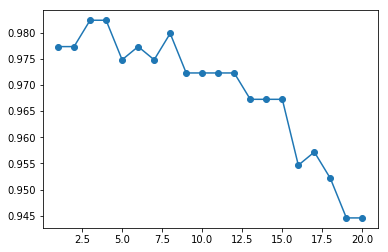

[0.9773299748110831, 0.9773299748110831, 0.982367758186398, 0.982367758186398, 0.9748110831234257, 0.9773299748110831, 0.9748110831234257, 0.9798488664987406, 0.9722921914357683, 0.9722921914357683, 0.9722921914357683, 0.9722921914357683, 0.9672544080604534, 0.9672544080604534, 0.9672544080604534, 0.9546599496221663, 0.9571788413098237, 0.9521410579345088, 0.9445843828715366, 0.9445843828715366]


In [150]:
#P1.2
import collections
k_axis = list(range(1,21,1))
accuracy = [0] * 20

for k in range(20):
    for i in range(X_val.shape[0]):
        most_similar = knn(k+1, X_train, X_val[i])
        
        for j in range(len(most_similar)):
            most_similar[j] = y_train[most_similar[j]]
            
        count = collections.Counter(most_similar)
        y_hat = count.most_common(1)[0][0] 
        
        if(y_hat == y_val[i]):
            accuracy[k] += 1
    accuracy[k] = accuracy[k] / X_val.shape[0]

plt.plot(k_axis,accuracy, marker='o')
plt.show()
print(accuracy)

In [152]:
#P1.2
accuracy = 0
for i in range(X_val.shape[0]):
    most_similar = knn(4, X_train, X_test[i])

    for j in range(len(most_similar)):
        most_similar[j] = y_train[most_similar[j]]

    count = collections.Counter(most_similar)
    y_hat = count.most_common(1)[0][0] #module이용

    if(y_hat == y_test[i]):
        accuracy += 1
accuracy = accuracy / X_val.shape[0]
print(accuracy)

0.9899244332493703


# Description P1.2
### validation
validation set의 데이터 한 행을 knn함수의 x query vector input(x_q)으로 사용해서 모든 데이터 set을 검증한다. knn의 리턴값이 X training set의 k most similar data index이므로 training set의 y 값으로 바꿔서 제일 많은 값을 y_hat로 나타냈다. 이 값과 validation y값을 비교해서 값이 같을 경우 accuracy를 하나씩 올려주었다. 마지막으로 accuracy를 비율로 바꿔주기위해 모든 데이터 셋의 인덱스 갯수로 나눠서 다시 accuracy에 넣어주고 이 값을 이용해 x축이 k이고 y축이 accuracy인 그래프를 그려주었다.<br>
collections 모듈을 이용해서 아래와같이 사용했다.<br> 
count = collections.Counter(most_similar)<br>
y_hat = count.most_common(1)[0][0]<br>
most_similar에는 가장 가까운 y값들이 저장되어있는데 이 값들을 dictionary를 이용해 [(value, #)] 로 표현한다. value는 y값이고 #는 리스트에 몇개나 있는지를 나타내준다. 따라서 가장 많이 이용된 값을 택하고 distance가 작은값 먼저 앞으로 오기때문에 y_hat = count.most_common(1)[0][0]을 이용해서 y_hat을 구했다.

### test
plot에서 k가 3(0.9874055415617129)과 4(0.9899244332493703)일때 peak이기 때문에 둘 다 대입해봤다. 하지만 k = 4일때가 더 높은 정확도를 나타냈다.